# NCAR EdEc Bootcamp, Non-Linear supervised scikit-learn models (Day 1, 2:40 PM)

Supervised Learning using non-linear methods (KNN and Decision Trees).

#### Discussion: 

Why would you need a non-linear model? What are the potential downsides to a non-linear model? Would your evaluation metrics change? 

~10 minutes

## Python Imports

In [1]:
import pandas as pd
import numpy as np

# Dataset
from palmerpenguins import load_penguins # this will be removed for the new dataset

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.3.0


## Dataset Loading

This will be replaced with a charlie dataset :) 

In [3]:
df = load_penguins()
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [4]:
df = df.drop(['year'], axis=1)
df = df.dropna() # this drops all rows with a nan in it
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Let's scale the dataset:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
float_columns = df.select_dtypes(include=['float64', 'float32'])
float_column_names = float_columns.columns.tolist()
float_column_names

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_scaled = scaler.fit_transform(float_columns, y=None)
np.shape(std_scaled)

(333, 4)

Everything above this is the ~same as notebook 2

## (Still) Supervised ML

We will cover two models right now, but scikit-learn can do all of these, with a nice overview [here](https://scikit-learn.org/stable/supervised_learning.html).

## Splitting Data

#### Regression split

Let's predict body mass from bill size and flipper size

In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(std_scaled[:,0:3], std_scaled[:,3], test_size=0.33, random_state=42)

#### Classification split

We will predict specie from all measurements

In [9]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(std_scaled, df.species, test_size=0.33, random_state=42)

# Non-Linear Models

## K-Nearest Neighbors (KNN) (2:50 PM)

K-Nearest Neighbors (KNN) is advantageous in supervised machine learning due to its simplicity and versatility. KNN's ability to adapt to different data distributions and handle multi-class problems makes it suitable for various scenarios. Its non-parametric nature eliminates the need for assumptions about data distribution, allowing it to capture complex decision boundaries. KNN's effectiveness, especially when combined with appropriate distance metrics and optimization techniques, makes it a valuable tool for supervised ML tasks. Some even call it a 'lazy learner' compared to more normal machine learning. 

Great video [here](https://www.youtube.com/watch?v=HVXime0nQeI) by StatQuest to watch on your own time. 

## Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# Create a KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train_clf, y_train_clf)

# Make predictions on the test data
y_pred_knn_clf = model.predict(X_test_clf)

# Calculate the accuracy and confusion matrix to evaluate the model's performance
accuracy = accuracy_score(y_test_clf, y_pred_knn_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_knn_clf)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Print the learned classes for each label
print("Learned Classes:", model.classes_)

Accuracy: 0.98
Confusion Matrix:
[[52  0  0]
 [ 2 23  0]
 [ 0  0 33]]
Learned Classes: ['Adelie' 'Chinstrap' 'Gentoo']


Input slider bar tutorial here for number of neighbors, and how they work

https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

## Regression (3:05PM)

In [12]:
# write your KNN regression code here!

# Decision Tree (3:15)

Decision trees are a machine learning algorithm that recursively partitions data by selecting the most important attributes, creating a tree-like structure with root, internal, and leaf nodes. They're used for both classification and regression, known for their interpretability, and can be prone to overfitting if not pruned or limited in depth. Decision trees are the basis for ensemble methods like Random Forests and Gradient Boosting (which we will learn tomorrow), and they are valuable for their simplicity and transparency in decision-making.

Using the 

In [13]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train_clf, y_train_clf)

# Make predictions on the test data
y_pred = clf.predict(X_test_clf)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_clf, y_pred)
print("Accuracy:", np.round(accuracy,3))

Accuracy: 0.964


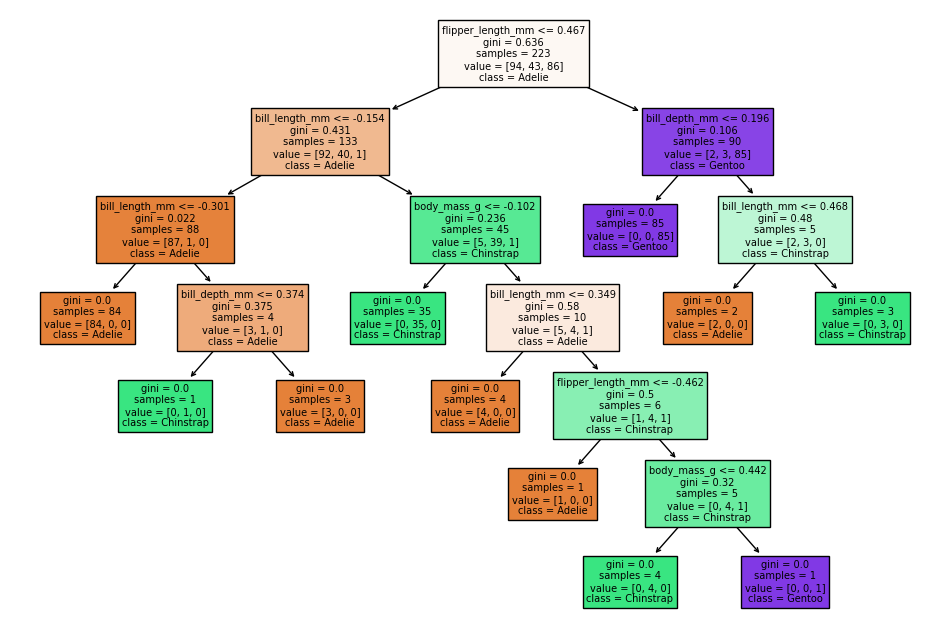

In [14]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=float_column_names, class_names=list(y_train_clf.unique()))
plt.show()

Wow! This a lot to unpack. Decision trees have a few parameters. Add them to the model above, and compare differences in accuracy and how the trees look:

Docs are [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). I reccomend looking at max depth, and minimum sample split to start.

## Discussion (3:45)

- Any issues / questions with the scikit learn interface? 
- Any preference between decision trees and knn's? 
- Is there a big difference between the metrics between both models?

## Tomorrow (3:55)

More tree based methods, which includes boosting and bagging! Decision trees are the basis for this. 